<a href="https://colab.research.google.com/github/TalDugma/Stroke-Prediction/blob/main/stroke-det-code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Imports**


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn import svm
from sklearn.svm import SVC
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import validation_curve
import seaborn as sns
from sklearn.inspection import permutation_importance


## **Reading The Data**





In [ ]:
raw_data = pd.read_csv('stroke_data2.csv')
diagnosis = raw_data['stroke']
raw_data = raw_data.drop(['stroke'], axis=1)
display(raw_data)
raw_data.info()

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,63,0,1,1,4,1,228.69,36.6,1
1,1,42,0,1,1,4,0,105.92,32.5,0
2,0,61,0,0,1,4,1,171.23,34.4,1
3,1,41,1,0,1,3,0,174.12,24.0,0
4,1,85,0,0,1,4,1,186.21,29.0,1
...,...,...,...,...,...,...,...,...,...,...
40905,1,38,0,0,0,4,1,120.94,29.7,1
40906,0,53,0,0,1,4,0,77.66,40.8,0
40907,1,32,0,0,1,2,0,231.95,33.2,0
40908,1,42,0,0,1,3,0,216.38,34.5,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40910 entries, 0 to 40909
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sex                40910 non-null  int64  
 1   age                40910 non-null  int64  
 2   hypertension       40910 non-null  int64  
 3   heart_disease      40910 non-null  int64  
 4   ever_married       40910 non-null  int64  
 5   work_type          40910 non-null  int64  
 6   Residence_type     40910 non-null  int64  
 7   avg_glucose_level  40910 non-null  float64
 8   bmi                40910 non-null  float64
 9   smoking_status     40910 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 3.1 MB


### **Feature Histograms**

array([[<Axes: title={'center': 'sex'}>, <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'hypertension'}>],
       [<Axes: title={'center': 'heart_disease'}>,
        <Axes: title={'center': 'ever_married'}>,
        <Axes: title={'center': 'work_type'}>],
       [<Axes: title={'center': 'Residence_type'}>,
        <Axes: title={'center': 'avg_glucose_level'}>,
        <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'smoking_status'}>, <Axes: >, <Axes: >]],
      dtype=object)

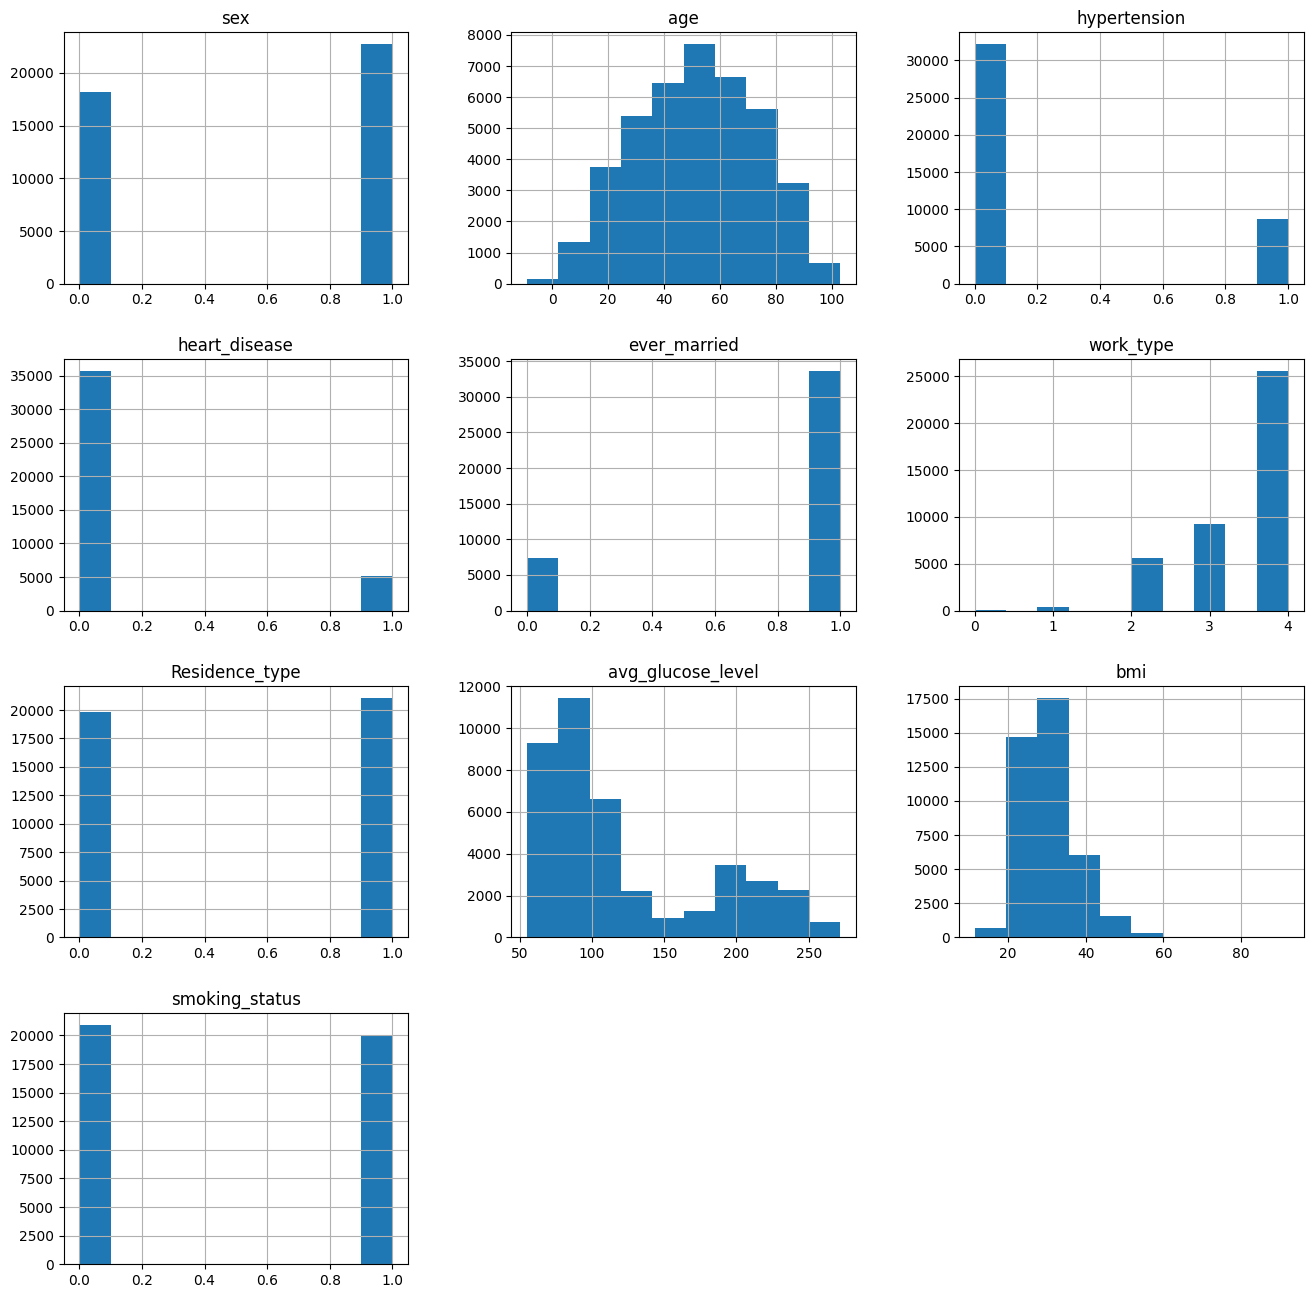

In [ ]:
raw_data.hist(figsize = (16,16))

### **One Hot Encoding**

In [ ]:
raw_data.work_type[raw_data['work_type'] == 2] = 'Govt job'
raw_data.work_type[raw_data['work_type'] == 3] = 'Self-employed'
raw_data.work_type[raw_data['work_type'] == 4] = 'Private'
one_hot_encode_cols = ['work_type']
for col in one_hot_encode_cols:
    raw_data[col] = pd.Categorical(raw_data[col])
raw_data = pd.get_dummies(raw_data, columns=one_hot_encode_cols)
raw_data= raw_data.drop(['work_type_0'],axis=1)
raw_data= raw_data.drop(['work_type_1'],axis=1)
raw_data.head()

<ipython-input-5-13653a948f8f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data.work_type[raw_data['work_type'] == 2] = 'Govt job'


,sex,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,work_type_Govt job,work_type_Private,work_type_Self-employed
0,1,63,0,1,1,1,228.69,36.6,1,0,1,0
1,1,42,0,1,1,0,105.92,32.5,0,0,1,0
2,0,61,0,0,1,1,171.23,34.4,1,0,1,0
3,1,41,1,0,1,0,174.12,24.0,0,0,0,1
4,1,85,0,0,1,1,186.21,29.0,1,0,1,0


## **Normalizing The Data**

In [ ]:
scaler = MinMaxScaler()
raw_data[['bmi']] = scaler.fit_transform(raw_data[['bmi']])
raw_data[['avg_glucose_level']] = scaler.fit_transform(raw_data[['avg_glucose_level']])
raw_data[['age']] = scaler.fit_transform(raw_data[['age']])
f_data = raw_data
display(raw_data)

,sex,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,work_type_Govt job,work_type_Private,work_type_Self-employed
0,1,0.642857,0,1,1,1,0.801265,0.311801,1,0,1,0
1,1,0.455357,0,1,1,0,0.234512,0.260870,0,0,1,0
2,0,0.625000,0,0,1,1,0.536008,0.284472,1,0,1,0
3,1,0.446429,1,0,1,0,0.549349,0.155280,0,0,0,1
4,1,0.839286,0,0,1,1,0.605161,0.217391,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
40905,1,0.419643,0,0,0,1,0.303850,0.226087,1,0,1,0
40906,0,0.553571,0,0,1,0,0.104053,0.363975,0,0,1,0
40907,1,0.366071,0,0,1,0,0.816314,0.269565,0,1,0,0
40908,1,0.455357,0,0,1,0,0.744437,0.285714,0,0,0,1


### **Skewness**

In [ ]:
qt = QuantileTransformer(n_quantiles=500, output_distribution='normal')
raw_data[['bmi']] = qt.fit_transform(raw_data[['bmi']])
raw_data[['avg_glucose_level']] = qt.fit_transform(raw_data[['avg_glucose_level']])
data_skew = raw_data[['age','avg_glucose_level','bmi']]
skew = pd.DataFrame(data_skew.skew())
skew.columns = ['skew']
skew['too_skewed'] = skew['skew'] > .75
skew

,skew,too_skewed
age,-0.078643,False
avg_glucose_level,0.270895,False
bmi,0.024287,False


### **Pie Graph**

([<matplotlib.patches.Wedge at 0x79c80a3d5e40>,
 [Text(-0.0004224626428795425, 1.0999999188751404, 'Had a stroke'),
  Text(0.0004225656323045258, -1.0999999188355818, 'Didnt have a stroke')],
 [Text(-0.0002304341688433868, 0.5999999557500765, '50.01%'),
  Text(0.00023049034489337766, -0.5999999557284991, '49.99%')])

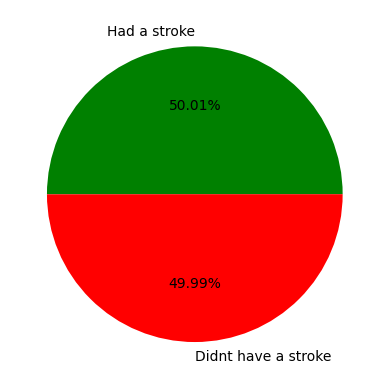

In [ ]:
num_of_positive = diagnosis.sum()
num_of_negative = len(diagnosis) - num_of_positive
labels = 'Had a stroke', 'Didnt have a stroke'
sizes = [num_of_positive/(len(diagnosis)),num_of_negative/(len(diagnosis))]
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%.2f%%', colors = ['green','red'])

### **Splitting The Data to Train-Validation-Test**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(f_data, diagnosis, test_size= 0.3, random_state=142)
x_val, x_test, y_val , y_test = train_test_split(x_test, y_test, test_size= 0.5, random_state=42)
print(x_train.shape)
print(x_test.shape)
print(x_val.shape)

(28637, 12)
(6137, 12)
(6136, 12)


## **Neural Network**

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(12,activation='relu'),
    tf.keras.layers.Dense(8,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)
history = model.fit(x_train, y_train, epochs=300, batch_size=20, verbose=0,callbacks = [early_stopping])

### **Neural Network Performance**

In [ ]:
val_pred = model.predict(x_test)
val_pred = np.array([0 if n <= .5 else 1 for n in val_pred])
acc = accuracy_score(y_test, val_pred)
print(f'Neural network accuracy: {round(acc,3)*100:.1f}%')

Exception ignored in: <function _xla_gc_callback at 0x7c9bc9465cf0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 98, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


192/192 [==============================] - 0s 1ms/step
Neural network accuracy: 88.6%


## **Loss and Accuracy over Epochs**

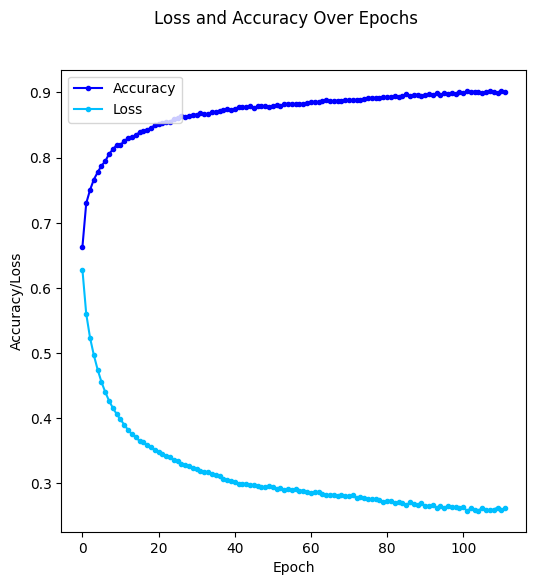

In [ ]:
fig, axs = plt.subplots(1, figsize=(6, 6))
fig.suptitle('Loss and Accuracy Over Epochs')
axs.plot(history.history['accuracy'], 'blue', marker=".")
axs.plot(history.history['loss'], 'deepskyblue', marker=".")
axs.set(ylabel='Accuracy/Loss')
axs.legend(['Accuracy', 'Loss'], loc='upper left')
plt.xlabel('Epoch')
plt.show()


### **KNN**

In [ ]:
param_grid = {'n_neighbors': [1,3,5,7,9,11,13,15,17,19],  #odd numbers because there are 2 classes in target coulmn
              'weights': ['distance', 'uniform']}
gridKNN = GridSearchCV(KNeighborsClassifier(), param_grid, refit = True, verbose = 3)
# fitting the model for grid search
gridKNN.fit(x_train, y_train)
y_pred_test = gridKNN.predict(x_test)
y_pred_train = gridKNN.predict(x_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END ...n_neighbors=1, weights=distance;, score=0.985 total time=   0.2s
[CV 2/5] END ...n_neighbors=1, weights=distance;, score=0.986 total time=   0.2s
[CV 3/5] END ...n_neighbors=1, weights=distance;, score=0.986 total time=   0.2s
[CV 4/5] END ...n_neighbors=1, weights=distance;, score=0.983 total time=   0.2s
[CV 5/5] END ...n_neighbors=1, weights=distance;, score=0.983 total time=   0.2s
[CV 1/5] END ....n_neighbors=1, weights=uniform;, score=0.985 total time=   0.5s
[CV 2/5] END ....n_neighbors=1, weights=uniform;, score=0.986 total time=   0.5s
[CV 3/5] END ....n_neighbors=1, weights=uniform;, score=0.986 total time=   0.4s
[CV 4/5] END ....n_neighbors=1, weights=uniform;, score=0.983 total time=   0.4s
[CV 5/5] END ....n_neighbors=1, weights=uniform;, score=0.983 total time=   0.5s
[CV 1/5] END ...n_neighbors=3, weights=distance;, score=0.979 total time=   0.2s
[CV 2/5] END ...n_neighbors=3, weights=distance

In [ ]:
print(gridKNN.best_estimator_)
print(f'KNN accuracy: {accuracy_score(y_test, y_pred_test)*100:.1f}%')

KNeighborsClassifier(n_neighbors=1, weights='distance')
KNN accuracy: 98.8%


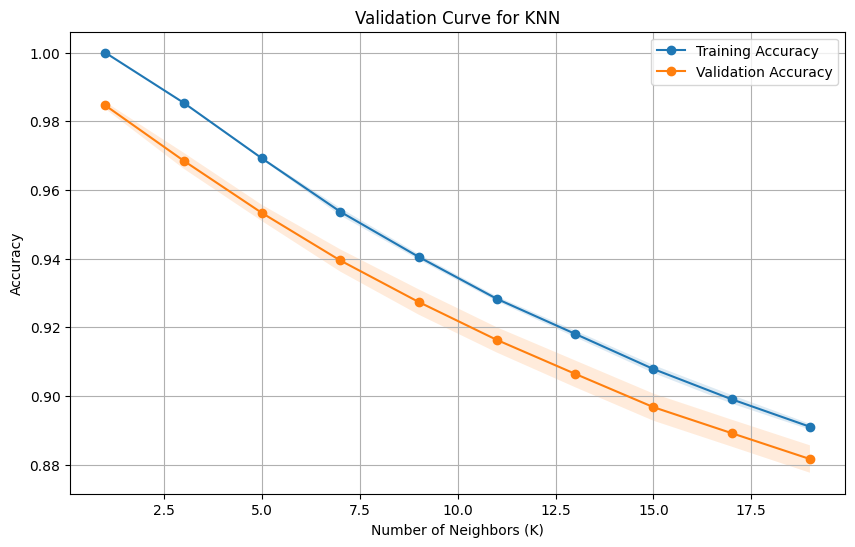

In [ ]:
param_range = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]
knn = KNeighborsClassifier()
train_scores, test_scores = validation_curve(
    knn,
    x_train, y_train,
    param_name="n_neighbors",
    param_range=param_range,
    cv=5,
    scoring="accuracy"
)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.figure(figsize=(10, 6))
plt.plot(param_range, train_mean, label="Training Accuracy", marker="o")
plt.fill_between(
    param_range,
    train_mean - train_std,
    train_mean + train_std,
    alpha=0.15
)
plt.plot(param_range, test_mean, label="Validation Accuracy", marker="o")
plt.fill_between(
    param_range,
    test_mean - test_std,
    test_mean + test_std,
    alpha=0.15
)
plt.title("Validation Curve for KNN")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

### **Random Forest**

In [ ]:
rf = RandomForestClassifier(random_state=40)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Accuracy:", accuracy)

ValueError: ignored

### **Feature Importance (acording to Random Forest)**

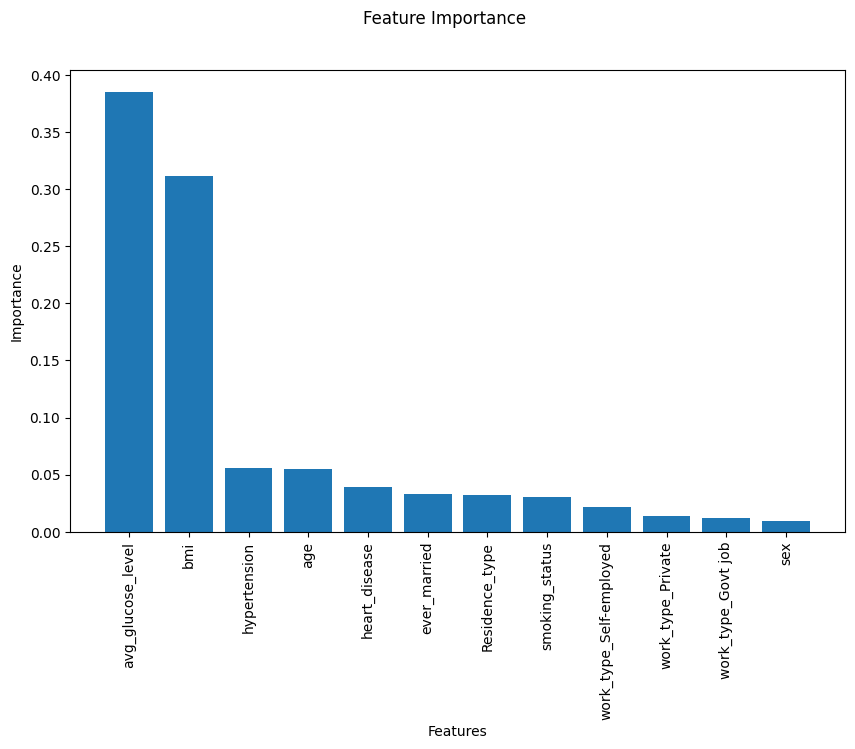

In [ ]:
importance = rf.feature_importances_
importance_df = pd.DataFrame({'Feature': f_data.columns.tolist(), 'Importance': importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
plt.suptitle('Feature Importance')
plt.bar(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.show()

### **SVM - Gamma Grid Search**

In [ ]:
param_grid = {

    'gamma': np.logspace(-3, 0, 4),
}
grid_search = GridSearchCV(SVC(kernel='rbf',probability=True), param_grid, cv=5, verbose=2, n_jobs=-1)
grid_search.fit(x_train, y_train)

In [ ]:
grid_search=SVC(kernel='rbf',gamma=1,probability=True)
grid_search.fit(x_train, y_train)

SVC(gamma=1, probability=True)

### **SVM Performance**

In [ ]:
y_pred = grid_search.predict(x_test)
print("SVM Accuracy:",accuracy_score(y_test, y_pred))

SVM Accuracy: 0.8999511161805442


### **Feature Importance (acording to SVM)**

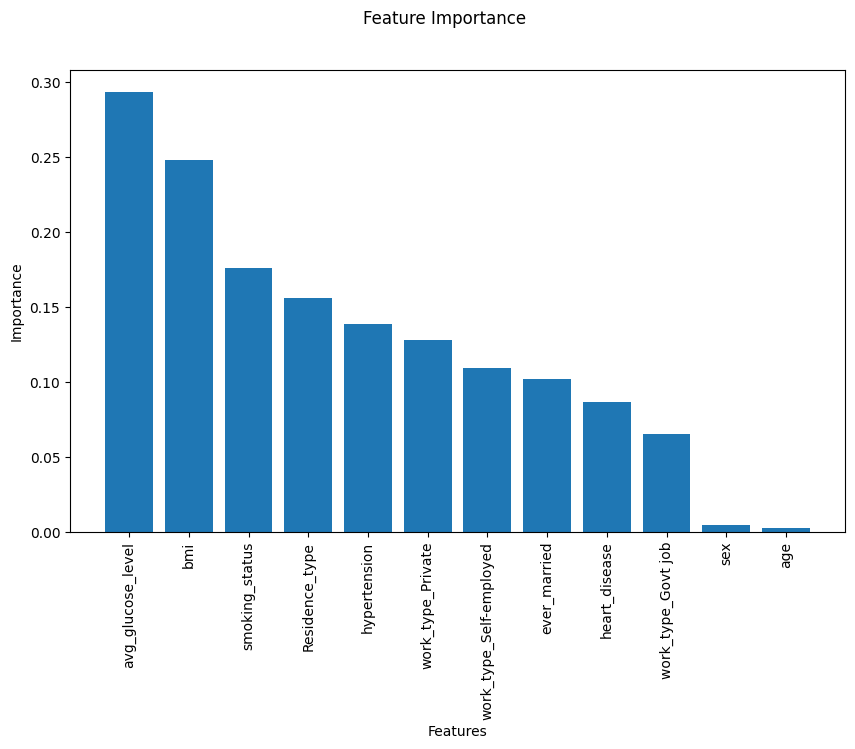

In [ ]:
result = permutation_importance(grid_search, x_test, y_test, n_repeats=20, random_state=42)
feature_names = f_data.columns.tolist()
importances = result.importances_mean
indices = np.argsort(importances)
importance_df = pd.DataFrame({'Feature': f_data.columns.tolist(), 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
plt.suptitle('Feature Importance')
plt.bar(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.show()

### **Model Comparison**

192/192 [==============================] - 0s 1ms/step
Random Forest: AUC = 1.00
Neural Network: AUC = 0.93
KNN: AUC = 0.99
SVM: AUC = 0.95


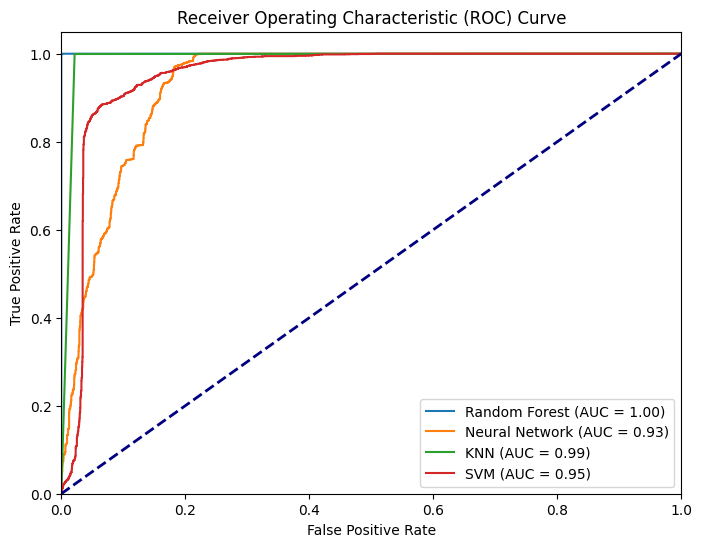

In [ ]:
models = {
    'Random Forest': rf,
    'Neural Network': model,
    'KNN': gridKNN,
    'SVM': grid_search
}
auc_scores = {}
plt.figure(figsize=(8, 6))
for model_name, model_type in models.items():
    if model_type == model:
        y_pred_prob = model_type.predict(x_test)
    else:
        y_pred_prob = model_type.predict_proba(x_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    auc = roc_auc_score(y_test, y_pred_prob)
    auc_scores[model_name] = auc
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
for model_name, auc in auc_scores.items():
    print(f'{model_name}: AUC = {auc:.2f}')
plt.show()